In [2]:
import torch
import torch.nn as nn
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
train_set = torchvision.datasets.MNIST("./data/", train=True,download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False,download=True)

In [5]:
x_0, y_0 = train_set[0]

In [6]:
trans = transforms.Compose([
    transforms.ToTensor()
])

c:\Users\vinicius.bezerra\Desktop\dev\mnist\.venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [7]:
x_0_tensor = trans(x_0)

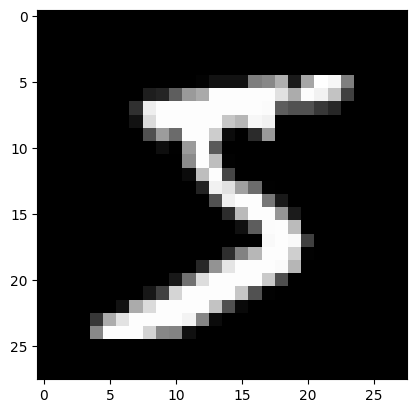

In [8]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

In [9]:
train_set.transform = trans
valid_set.transform = trans

In [10]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

In [11]:
input_size = 1 * 28 * 28
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Linear(512,n_classes)
]

In [13]:
model = nn.Sequential(*layers)

In [23]:
model.to(device)
model.compile()

In [24]:
loss_function = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters())

In [25]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [26]:
def get_batch_accuracy(output: Tensor, y: Tensor, N):
    pred = output.argmax(dim=1,keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [27]:
def train():
    loss = 0 
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output,y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output,y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [28]:
def validate():
    loss =0
    accuracy = 0 

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            
            loss += loss_function(output,y).item()
            accuracy += get_batch_accuracy(output,y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [72]:
epochs = 5

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 52.6547 Accuracy: 0.9912
Valid - Loss: 23.7210 Accuracy: 0.9824
Epoch: 1
Train - Loss: 50.4199 Accuracy: 0.9915
Valid - Loss: 25.8521 Accuracy: 0.9797
Epoch: 2
Train - Loss: 40.2590 Accuracy: 0.9933
Valid - Loss: 29.9006 Accuracy: 0.9784
Epoch: 3
Train - Loss: 39.7465 Accuracy: 0.9935
Valid - Loss: 31.1290 Accuracy: 0.9791
Epoch: 4
Train - Loss: 36.2232 Accuracy: 0.9940
Valid - Loss: 35.5515 Accuracy: 0.9788


In [ ]:
from PIL import Image

x_img = Image.open("mnist_digit.png")

x_img_tensor = trans(x_img)

# x_img_tensor

pred = model(x_img_tensor)
pred.argmax(dim=1, keepdim=True).item()

8

In [113]:

list(zip(range(9),pred.softmax(dim=1).tolist()[0]))

[(0, 9.306426072483442e-13),
 (1, 8.712564891766306e-09),
 (2, 4.055123099533375e-06),
 (3, 0.008127288892865181),
 (4, 4.803079045601066e-10),
 (5, 3.022074812619735e-09),
 (6, 2.965327289272679e-11),
 (7, 9.123796829157982e-09),
 (8, 0.9918686151504517)]

In [98]:
torch.save(model,"modelo.pth")

In [14]:
model.load_state_dict(torch.load("modelo.pth",weights_only=True))

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL torch.nn.modules.container.Sequential was not an allowed global by default. Please use `torch.serialization.add_safe_globals([Sequential])` or the `torch.serialization.safe_globals([Sequential])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.